In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
def ETL_d(path):
    df = pd.read_csv(path)
    df.set_index(df.iloc[:,0],inplace=True)
    df.index = pd.to_datetime(df.index)
#     df.index = df.index.to_period('M')
     #     parse_dates = True
    freeze=True
    #     parser = parser
    df.dropna(inplace=True)
    df.parse_dates=True
    df =pd.DataFrame(df,columns =['Close'])
    return df

In [21]:
df = ETL_d(r'C:\Users\kelvin\Downloads\AAL.csv')
print(df.shape)
df.tail()

(252, 1)


,Close
Date,
2023-05-17,14.91
2023-05-18,15.05
2023-05-19,14.82
2023-05-22,14.38
2023-05-23,14.07


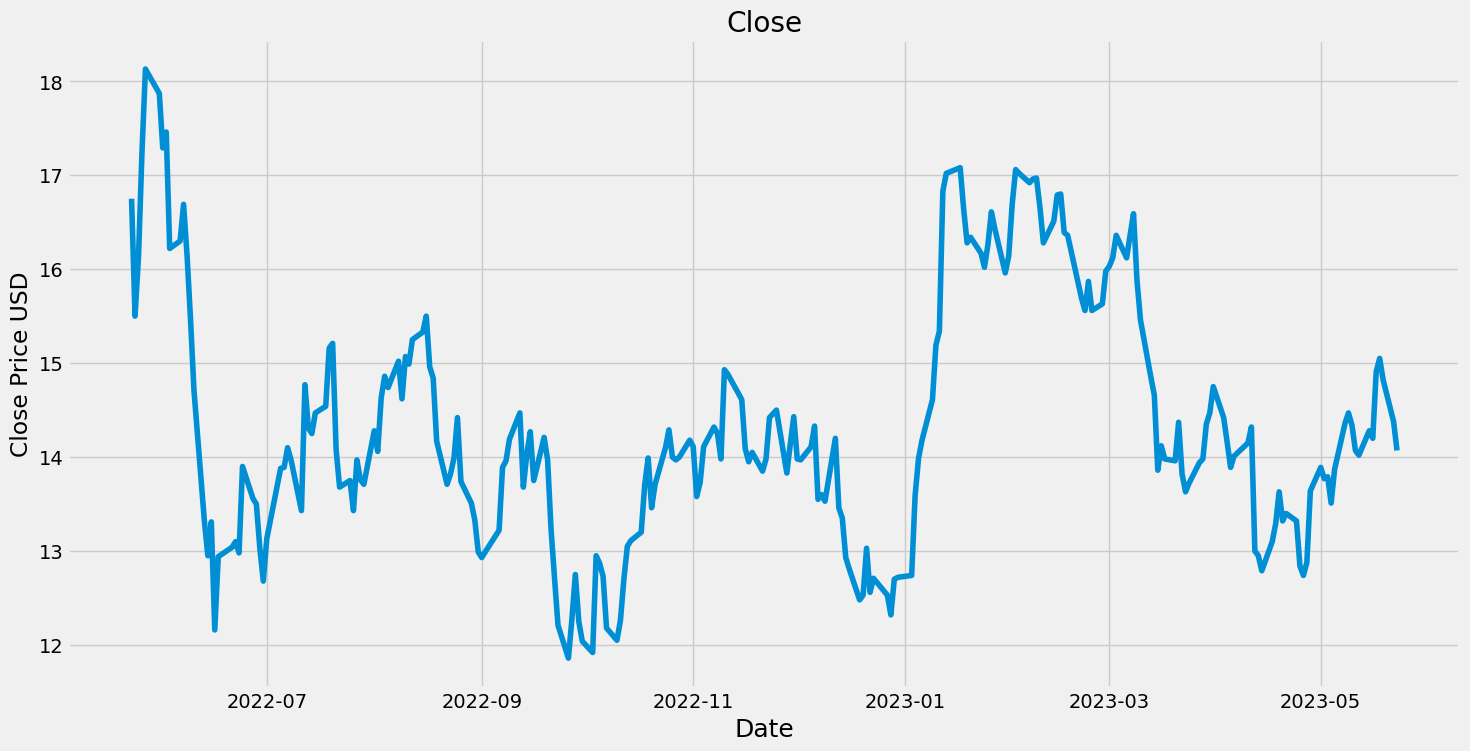

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close Price USD")
plt.show()

In [23]:
dataset = df.values
dataset

array([[16.75    ],
       [15.5     ],
       [16.129999],
       [17.24    ],
       [18.129999],
       [17.870001],
       [17.290001],
       [17.459999],
       [16.219999],
       [16.299999],
       [16.690001],
       [16.15    ],
       [15.47    ],
       [14.71    ],
       [13.32    ],
       [12.95    ],
       [13.31    ],
       [12.16    ],
       [12.94    ],
       [13.04    ],
       [13.1     ],
       [12.98    ],
       [13.9     ],
       [13.56    ],
       [13.5     ],
       [13.03    ],
       [12.68    ],
       [13.13    ],
       [13.88    ],
       [13.89    ],
       [14.1     ],
       [13.97    ],
       [13.43    ],
       [14.77    ],
       [14.31    ],
       [14.25    ],
       [14.47    ],
       [14.54    ],
       [15.16    ],
       [15.21    ],
       [14.08    ],
       [13.68    ],
       [13.75    ],
       [13.43    ],
       [13.97    ],
       [13.76    ],
       [13.71    ],
       [14.28    ],
       [14.06    ],
       [14.63    ],


In [24]:
import math
training_data_len = math.ceil((len(dataset))*0.8)
training_data_len = math.ceil((len(dataset))*0.8)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.77990443],
       [0.58054236],
       [0.68102068],
       [0.85805436],
       [1.        ],
       [0.95853301],
       [0.86602901],
       [0.89314193],
       [0.69537475],
       [0.70813392],
       [0.77033521],
       [0.68421064],
       [0.57575767],
       [0.45454553],
       [0.2328549 ],
       [0.17384373],
       [0.23126   ],
       [0.0478469 ],
       [0.17224883],
       [0.1881978 ],
       [0.19776718],
       [0.17862842],
       [0.3253589 ],
       [0.27113242],
       [0.26156304],
       [0.1866029 ],
       [0.13078152],
       [0.20255187],
       [0.32216911],
       [0.32376401],
       [0.35725684],
       [0.33652318],
       [0.25039876],
       [0.46411491],
       [0.39074966],
       [0.38118028],
       [0.41626801],
       [0.42743229],
       [0.52631587],
       [0.53429036],
       [0.35406704],
       [0.29027118],
       [0.30143545],
       [0.25039876],
       [0.33652318],
       [0.30303035],
       [0.29505587],
       [0.385

In [26]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.77990443, 0.58054236, 0.68102068, 0.85805436, 1.        ,
       0.95853301, 0.86602901, 0.89314193, 0.69537475, 0.70813392,
       0.77033521, 0.68421064, 0.57575767, 0.45454553, 0.2328549 ,
       0.17384373, 0.23126   , 0.0478469 , 0.17224883, 0.1881978 ,
       0.19776718, 0.17862842, 0.3253589 , 0.27113242, 0.26156304,
       0.1866029 , 0.13078152, 0.20255187, 0.32216911, 0.32376401,
       0.35725684, 0.33652318, 0.25039876, 0.46411491, 0.39074966,
       0.38118028, 0.41626801, 0.42743229, 0.52631587, 0.53429036,
       0.35406704, 0.29027118, 0.30143545, 0.25039876, 0.33652318,
       0.30303035, 0.29505587, 0.38596497, 0.35087725, 0.44178635,
       0.47846898, 0.45933022, 0.50398732, 0.44019146, 0.5119618 ,
       0.49920263, 0.54066994, 0.55342912, 0.58054236, 0.49441794])]
[0.47527918266015656]

[array([0.77990443, 0.58054236, 0.68102068, 0.85805436, 1.        ,
       0.95853301, 0.86602901, 0.89314193, 0.69537475, 0.70813392,
       0.77033521, 0.68421064, 0.57

In [27]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [28]:
x_train = np.reshape(x_train,(x_train.shape[0],60,1))
x_train.shape

(142, 60, 1)

In [29]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer ='adam',loss='mean_squared_error')

In [31]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [32]:
x_test = np.array(x_test)

In [33]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [34]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 9s 103ms/step


In [35]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 0s 38ms/step


C:\Users\kelvin\AppData\Local\Temp\ipykernel_14768\2094784349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


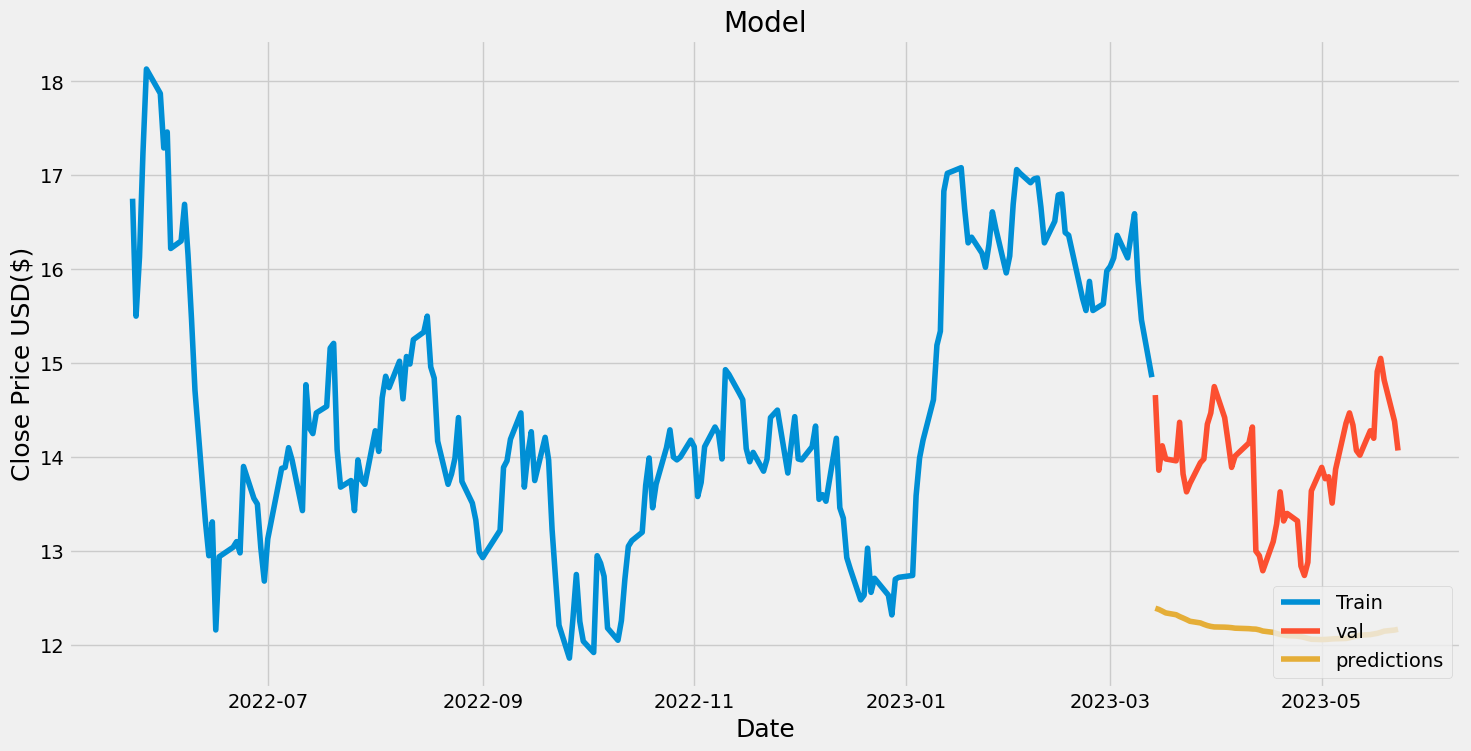

In [36]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [37]:
valid

,Close,predictions
Date,,
2023-03-14,14.66,12.391165
2023-03-15,13.86,12.378531
2023-03-16,14.12,12.360468
2023-03-17,13.98,12.341317
2023-03-20,13.96,12.321913
2023-03-21,14.37,12.302875
2023-03-22,13.82,12.286933
2023-03-23,13.63,12.270202
2023-03-24,13.72,12.252197
